# 📊 Data Analysis Project: Bike Sharing System
### A Comprehensive Analysis of Bike Rental Trends and Patterns

This project aims to analyze and visualize the bike rental data to uncover insights about usage patterns, seasonal trends, and the impact of various factors on bike rentals.

### Defining the Analysis Questions 🧐

The bike-sharing rental process is significantly influenced by various environmental and seasonal factors. Conditions such as weather, precipitation, day of the week, season, and hour of the day can all impact rental behaviors. This analysis is based on a two-year historical dataset from the Capital Bikeshare system in Washington D.C., USA, covering the years 2011 and 2012.

1. **How did bike rental performance change from 2011 to 2012?**
   
2. **What are the rental patterns on holidays, weekends, and weekdays?**

### Setting Up All Required Libraries 📚🔧

Before we dive into the analysis, we need to import the necessary libraries that will help us process and visualize the bike-sharing data. Below are the essential libraries we will be using:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Wrangling 🔍

#### Gathering Data 📥

In this section, we will read the dataset that we want to analyze from the designated data folder. This step is crucial as it sets the foundation for our analysis.

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Assessing Data 📋

##### Evaluating the `day_df` Table

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- **Data Type Changes:** The column `dteday` requires a change in data type.
- **Missing Values:** There are no missing values present.
- **Duplicate Data:** There are no duplicate entries.

##### Evaluating the `hour_df` Table

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- **Data Type Changes:** The column `dteday` also requires a change in data type.
- **Missing Values:** There are no missing values present.
- **Duplicate Data:** There are no duplicate entries.

- The two datasets are quite similar; the primary difference is that the `hour_df` includes an additional column, `hr`, to indicate the hour during which the bike rental transactions occurred. To address the defined business questions, we only need to utilize one dataset. We will proceed with the `hour_df` dataset.

- The selected dataset does not contain any missing values or duplicate records.
- We need to change the data type of the `dteday` column from `object` to `datetime`.
- Next, we will ensure that the `mnth` and `weekday` columns align with the `dteday` column.
- Additionally, we will update the values in categorical columns, such as `season`, `holiday`, `workingday`, and `weathersit`, to facilitate the analysis process.
- Finally, we will add a `weekend` column to identify whether a given day falls on a weekend, which will help in addressing our business questions more effectively.

#### Cleaning Data 🧹

##### Column `dteday`

Conversion to Datetime: The `dteday` column will be converted to the `datetime` data type to facilitate date-related operations and analysis.

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Column `season`

Renaming Seasons: The `season` column will be modified to use descriptive names (e.g., "Spring," "Summer," "Fall," "Winter") for easier analysis and better understanding of the dataset.

In [14]:
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Column `yr`

Renaming Year: The `yr` column will be transformed to represent actual years (e.g., 2011 and 2012) instead of binary values (0 and 1) to facilitate easier analysis and interpretation of the data.


In [15]:
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Column `mnth`

Verification of Month: We will check whether the `mnth` column aligns with the month derived from the `dteday` column.

In [16]:
hour_df['dteday_mnth'] = hour_df['dteday'].dt.month
mismatch = hour_df[hour_df['mnth'] != hour_df['dteday_mnth']]
mismatch

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_mnth


The `mnth` column is consistent with the `dteday` column, confirming its accuracy.

In [17]:
hour_df.drop(columns=['dteday_mnth'], inplace=True)

hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Column `holiday` 


Updating Column Values: We will modify the contents of the `holiday` column for clarity.
  - 0 = Not a Holiday
  - 1 = Holiday

In [18]:
holiday_mapping = {0: 'Not', 1: 'Holiday'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Not,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Not,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Not,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Not,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Not,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Column `weekday`

Validation of Weekday Values: We will check if the `weekday` column accurately corresponds to the days derived from the `dteday` column.


In [19]:
hour_df['dteday_weekday'] = hour_df['dteday'].dt.weekday
mismatch = hour_df[hour_df['weekday'] != hour_df['dteday_weekday']]
mismatch

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_weekday
0,1,2011-01-01,Springer,2011,1,0,Not,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,5
1,2,2011-01-01,Springer,2011,1,1,Not,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,5
2,3,2011-01-01,Springer,2011,1,2,Not,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,5
3,4,2011-01-01,Springer,2011,1,3,Not,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,5
4,5,2011-01-01,Springer,2011,1,4,Not,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,Not,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0
17375,17376,2012-12-31,Springer,2012,12,20,Not,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0
17376,17377,2012-12-31,Springer,2012,12,21,Not,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0
17377,17378,2012-12-31,Springer,2012,12,22,Not,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0


It appears there may be discrepancies in conversion between the dataset and pandas. To ensure accuracy, we will use the results generated by pandas.

In [20]:
hour_df['weekday'] = hour_df['dteday_weekday']
hour_df.drop(columns=['dteday_weekday'], inplace=True)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Not,5,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Not,5,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Not,5,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Not,5,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Not,5,0,1,0.24,0.2879,0.75,0.0,0,1,1


Updating Weekday Values: We will convert the `weekday` values into the corresponding day names for easier analysis.

In [21]:
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Not,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Not,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Not,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Not,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Not,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Column `workingday`

Updating Workingday Values: We will modify the contents of the `workingday` column to enhance clarity:
  - 0 = Not Working Day
  - 1 = Working Day

In [22]:
working_mapping = {0: 'Not', 1: 'Workingday'}
hour_df['workingday'] = hour_df['workingday'].map(working_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Not,Saturday,Not,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Not,Saturday,Not,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Not,Saturday,Not,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Not,Saturday,Not,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Not,Saturday,Not,1,0.24,0.2879,0.75,0.0,0,1,1


##### Column `weathersit`

Updating Weather Situation Values: We will modify the contents of the `weathersit` column for better understanding:
  - 1 = Clear
  - 2 = Cloudy
  - 3 = Light Rain/Snow
  - 4 = Stormy

In [23]:
weathersit_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Stromy'}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Not,Saturday,Not,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Not,Saturday,Not,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Not,Saturday,Not,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Not,Saturday,Not,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Not,Saturday,Not,Clear,0.24,0.2879,0.75,0.0,0,1,1


##### Adding a New Column

Creating Weekend Column: We will add a new column called `weekend` to indicate whether the day is a weekend or not.

In [24]:
hour_df['weekend'] = hour_df['weekday'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Not')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
0,1,2011-01-01,Springer,2011,1,0,Not,Saturday,Not,Clear,0.24,0.2879,0.81,0.0,3,13,16,Weekend
1,2,2011-01-01,Springer,2011,1,1,Not,Saturday,Not,Clear,0.22,0.2727,0.80,0.0,8,32,40,Weekend
2,3,2011-01-01,Springer,2011,1,2,Not,Saturday,Not,Clear,0.22,0.2727,0.80,0.0,5,27,32,Weekend
3,4,2011-01-01,Springer,2011,1,3,Not,Saturday,Not,Clear,0.24,0.2879,0.75,0.0,3,10,13,Weekend
4,5,2011-01-01,Springer,2011,1,4,Not,Saturday,Not,Clear,0.24,0.2879,0.75,0.0,0,1,1,Weekend


### Exploratory Data Analysis 🔍

#### Bike Rentals per Year 🚲

In [25]:
hour_df.groupby(by='yr').cnt.sum().sort_values(ascending=False).reset_index()

,yr,cnt
0,2012,2049576
1,2011,1243103


The highest number of bike rentals occurred in **2012**, totaling **2,049,576 rentals**.

#### Monthly Rentals for Each Year 📅

##### 2011

In [26]:
year2011_df = hour_df[hour_df['yr'] == 2011]

year2011_df.groupby(by='mnth').cnt.sum().reset_index().sort_values(by='mnth', ascending=True)

,mnth,cnt
0,1,38189
1,2,48215
2,3,64045
3,4,94870
4,5,135821
5,6,143512
6,7,141341
7,8,136691
8,9,127418
9,10,123511


##### 2012

In [27]:
year2012_df = hour_df[hour_df['yr'] == 2012]

year2012_df.groupby(by='mnth').cnt.sum().reset_index().sort_values(by='mnth', ascending=True)

,mnth,cnt
0,1,96744
1,2,103137
2,3,164875
3,4,174224
4,5,195865
5,6,202830
6,7,203607
7,8,214503
8,9,218573
9,10,198841


#### Rentals by Season 🌦️

In [28]:
hour_df.groupby(by='season').cnt.sum().sort_values(ascending=False).reset_index()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


It turns out that the highest rentals occurred during **Autumn**.

#### Rentals Based on Weather Conditions ☁️

In [29]:
hour_df.groupby(by='weathersit').cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,Clear,2338173
1,Cloudy,795952
2,Light Rain/Snow,158331
3,Stromy,223


Surprisingly, some rentals occurred during stormy conditions; however, most rentals happened during **clear** weather.

#### Rentals per Day of the Week 📊

In [30]:
hour_df.groupby(by='weekday').cnt.sum().sort_values(ascending=False).reset_index()

,weekday,cnt
0,Friday,487790
1,Thursday,485395
2,Saturday,477807
3,Wednesday,473048
4,Tuesday,469109
5,Monday,455503
6,Sunday,444027


Over the span of **two years (2011-2012)**, the average number of rentals per day remained consistent. The fewest rentals were recorded on **Sundays**, while the highest occurred on **Fridays**.

#### Rentals Based on User Type 👥

In [31]:
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

print("Casual Users:", total_casual)
print("Registered Users:", total_registered)

Casual Users: 620017
Registered Users: 2672662


A significant number of **registered users** rented bikes during the **2011-2012** period.

#### Rentals by Hour ⏰

In [32]:
hour_df.groupby(by='hr').cnt.sum().sort_values(ascending=False).reset_index().head(5)

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789


The peak rental hours correspond to **commuting times**, specifically between **17:00-18:00** and **08:00**.

#### Rentals on Holidays, Weekends, and Working Days 📆

In [33]:
hour_df.groupby(by='holiday').cnt.sum().sort_values(ascending=False).reset_index()

,holiday,cnt
0,Not,3214244
1,Holiday,78435


**Holidays**: Rentals are notably higher on **non-holidays**.

In [34]:
hour_df.groupby(by='weekend').cnt.sum().sort_values(ascending=False).reset_index()


,weekend,cnt
0,Not,2370845
1,Weekend,921834


**Weekends**: Rentals tend to be lower on **weekends**.

In [35]:
hour_df.groupby(by='workingday').cnt.sum().sort_values(ascending=False).reset_index()

,workingday,cnt
0,Workingday,2292410
1,Not,1000269


**Working Days**: The majority of rentals occur on **working days**.

### Visualization & Explanatory Analysis 📊

#### 1. How Did Bike Rentals Perform from 2011 to 2012?

##### Total Bike Rentals by Year 📅

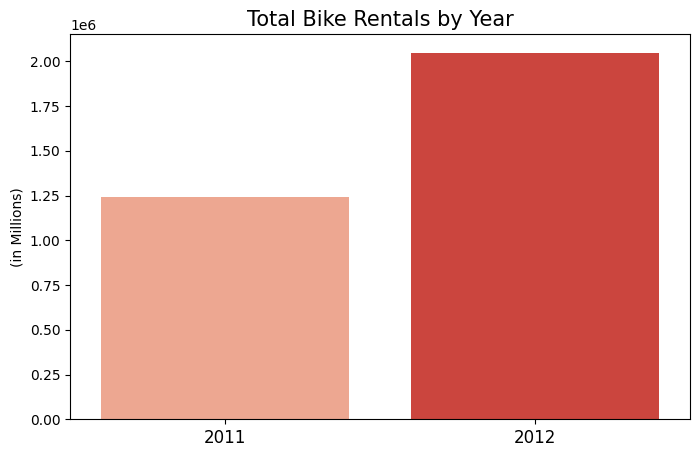

In [36]:
year_rentals_df = hour_df.groupby(by='yr').cnt.sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))

sns.barplot(
    y= 'cnt',
    x= 'yr',
    data= year_rentals_df,
    palette= "Reds"
)

plt.title("Total Bike Rentals by Year", loc="center", fontsize=15)
plt.ylabel("(in Millions)")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


From the visualization, we observe a **significant increase** in bike rentals from **2011 to 2012**.

##### Total Bike Rentals by Month (2011) 📆

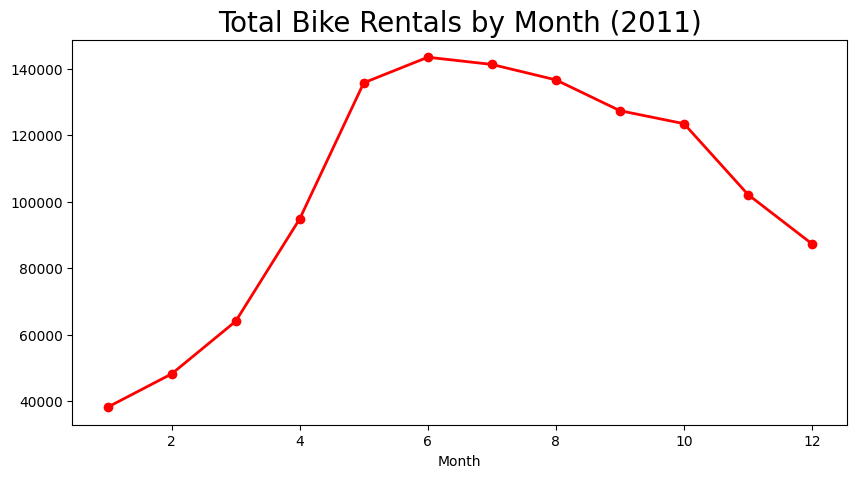

In [37]:
year2011_df = hour_df[hour_df['yr'] == 2011]

total_rental_2011_df = year2011_df.groupby(by='mnth').cnt.sum().reset_index().sort_values(by='mnth', ascending=True)

plt.figure(figsize=(10,5))
plt.plot(
    total_rental_2011_df['mnth'],
    total_rental_2011_df['cnt'],
    marker='o',
    linewidth=2,
    color='#FF0000'
)

plt.title("Total Bike Rentals by Month (2011)", loc="center", fontsize=20)
plt.xlabel("Month")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In **2011**, bike rentals peaked between **May and September**. The number of rentals gradually increased from the beginning of the year, reaching a high in **June**, before declining in the following months.

##### Total Bike Rentals by Month (2012) 📆

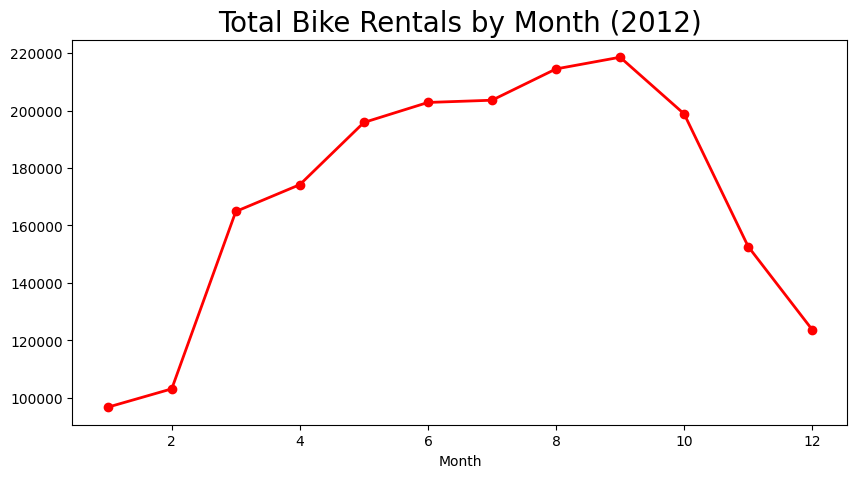

In [38]:
year2012_df = hour_df[hour_df['yr'] == 2012]

total_rental_2012_df = year2012_df.groupby(by='mnth').cnt.sum().reset_index().sort_values(by='mnth', ascending=True)

plt.figure(figsize=(10,5))
plt.plot(
    total_rental_2012_df['mnth'],
    total_rental_2012_df['cnt'],
    marker='o',
    linewidth=2,
    color='#FF0000'
)

plt.title("Total Bike Rentals by Month (2012)", loc="center", fontsize=20)
plt.xlabel("Month")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In **2012**, the highest rentals occurred between **July and September**. Additionally, rentals increased steadily from the start of the year until **September**, after which there was a sharp decline from **October to December**.


##### Total Bike Rentals by Season 🍂

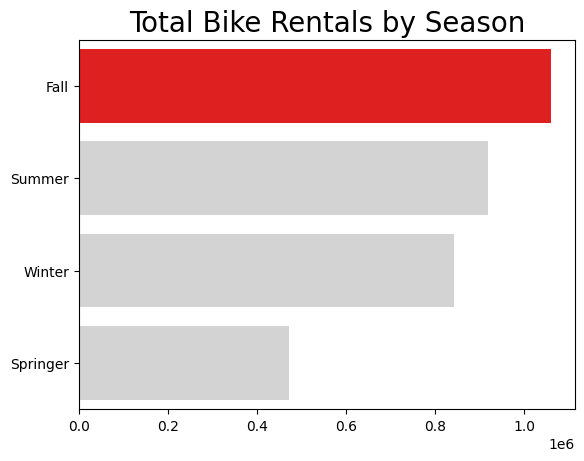

In [39]:
total_rental_season_df = hour_df.groupby(by='season').cnt.sum().sort_values(ascending=False).reset_index()
colors = ["#FF0000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="cnt", 
    y="season",
    data= total_rental_season_df,
    palette= colors
)
plt.title("Total Bike Rentals by Season", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Across both years, **Autumn** was the season with the highest number of bike rentals.

##### Total Bike Rentals by Weather Conditions 🌤️

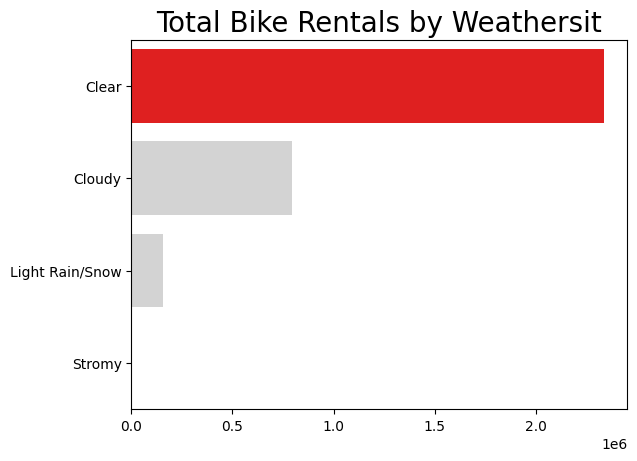

In [40]:
total_rental_weathersit_df = hour_df.groupby(by='weathersit').cnt.sum().sort_values(ascending=False).reset_index()
colors = ["#FF0000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="cnt", 
    y="weathersit",
    data= total_rental_weathersit_df,
    palette= colors
)
plt.title("Total Bike Rentals by Weathersit", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Over the two-year period, most rentals occurred when the weather was **clear**, although there were some rentals even during **stormy conditions**.

##### Total Bike Rentals by Days of the Week 📅

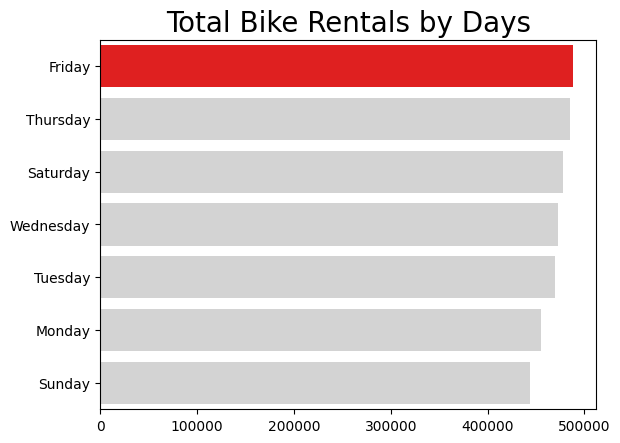

In [41]:
total_rental_day_df = hour_df.groupby(by='weekday').cnt.sum().reset_index().sort_values(by='cnt', ascending=False)
colors = ["#FF0000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="cnt", 
    y="weekday",
    data= total_rental_day_df,
    palette= colors
)
plt.title("Total Bike Rentals by Days", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

The average number of rentals remained consistent across the week, with the fewest rentals on **Sundays** and the most on **Fridays**.

##### Proportion of Users (Registered vs. Casual) 👥

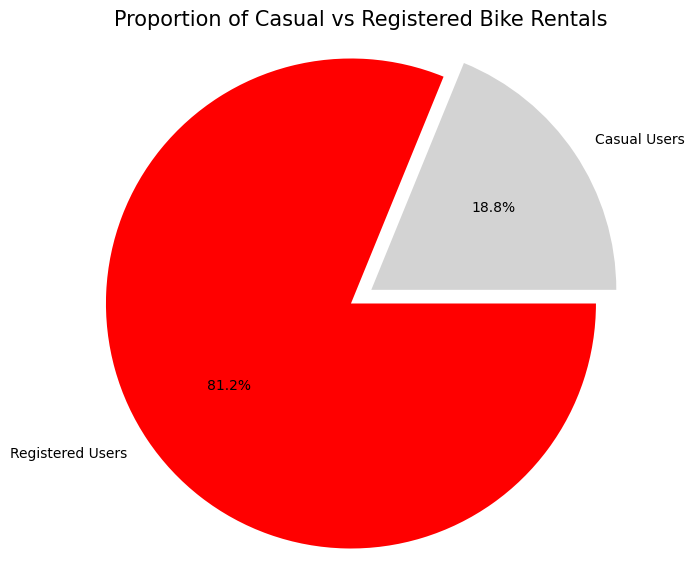

In [42]:
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

labels = ['Casual Users', 'Registered Users']
sizes = [total_casual, total_registered]
colors = ['#D3D3D3', '#FF0000']
explode = (0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)

plt.axis('equal')  
plt.title("Proportion of Casual vs Registered Bike Rentals", fontsize=15)
plt.show()


Registered users accounted for the majority of bike rentals throughout 2011 and 2012.


##### Hours with Highest Bike Rentals ⏰

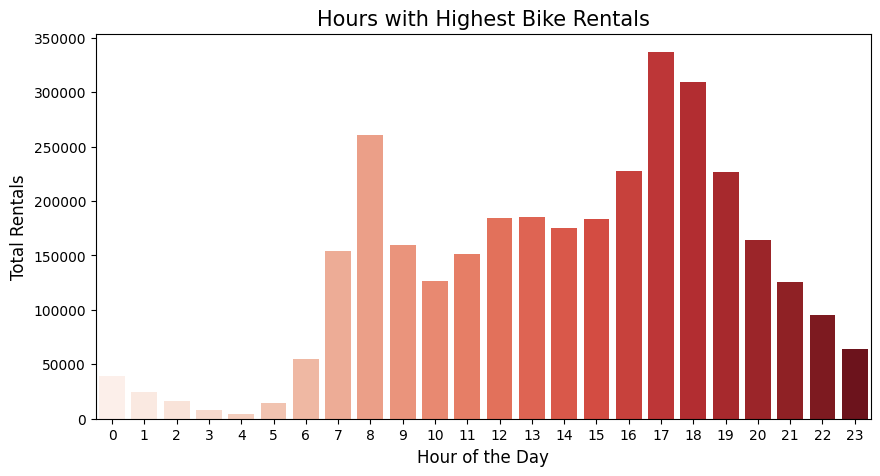

In [48]:
rentals_hours_df = hour_df.groupby(by='hr').cnt.sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(
    x = 'hr', 
    y = 'cnt', 
    data = rentals_hours_df, 
    palette = "Reds"
)

plt.title('Hours with Highest Bike Rentals', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


The most frequent rental times were during **commute hours**: between **8:00 AM** and **5:00-6:00 PM**.

#### 2. How Does Bike Rental Behavior Differ on Holidays, Weekends, and Working Days? 🎯

##### Rentals on Holidays 🏖️

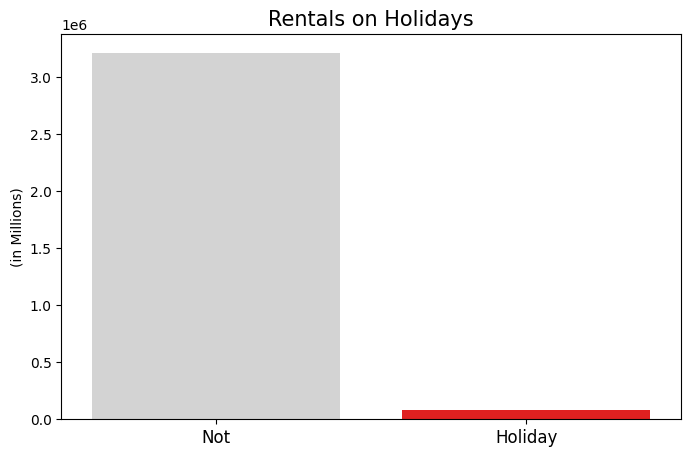

In [44]:
rental_holiday_df = hour_df.groupby(by='holiday').cnt.sum().sort_values(ascending=False).reset_index()
colors = ["#D3D3D3", "#FF0000"]
plt.figure(figsize=(8,5))

sns.barplot(
    y= 'cnt',
    x= 'holiday',
    data= rental_holiday_df,
    palette= colors
)

plt.title("Rentals on Holidays", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("(in Millions)")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Bike rentals were significantly lower on **holidays**.

##### Rentals on Weekends 🌅

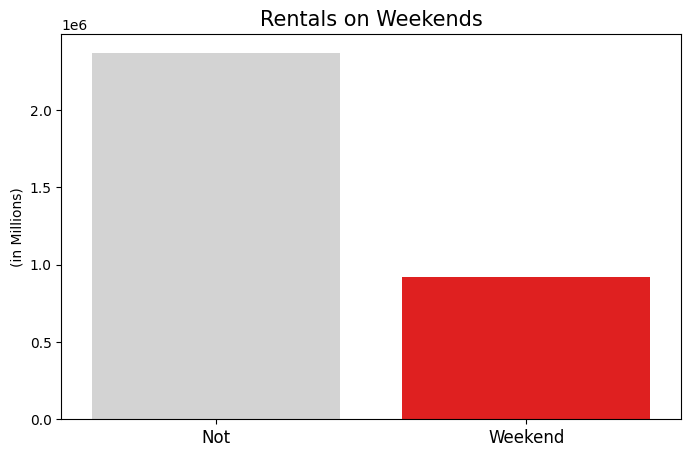

In [45]:
rental_weekend_df = hour_df.groupby(by='weekend').cnt.sum().sort_values(ascending=False).reset_index()
colors = ["#D3D3D3", "#FF0000"]
plt.figure(figsize=(8,5))

sns.barplot(
    y= 'cnt',
    x= 'weekend',
    data= rental_weekend_df,
    palette= colors
)

plt.title("Rentals on Weekends", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("(in Millions)")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Weekends** also showed lower rental activity compared to regular working days.


##### Rentals on Working Days 💼

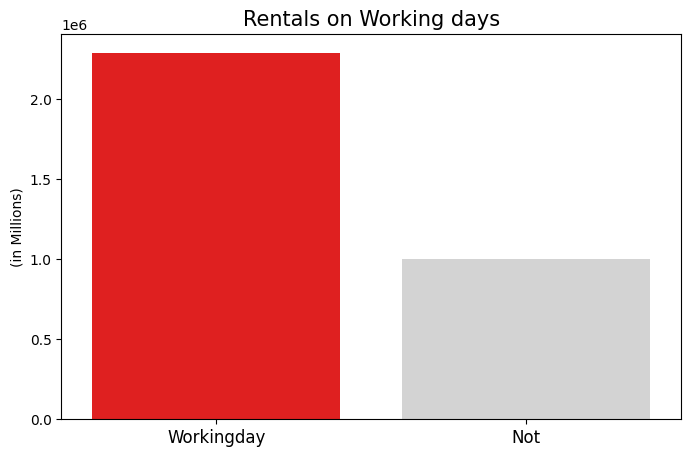

In [51]:
rental_workingday_df = hour_df.groupby(by='workingday').cnt.sum().sort_values(ascending=False).reset_index()
colors = ["#FF0000","#D3D3D3"]
plt.figure(figsize=(8,5))

sns.barplot(
    y = 'cnt',
    x = 'workingday',
    data = rental_workingday_df,
    palette = colors
)

plt.title("Rentals on Working days", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("(in Millions)")
plt.tick_params(axis='x', labelsize=12)
plt.show()

The highest number of rentals occurred on **working days**.

### Conclusion 📈

From the analysis, we can draw several key insights:

- There was a **notable increase** in bike rentals from **2011 to 2012**.
- In **2011**, the highest rental activity occurred between **May and September**, peaking in **June**, followed by a decline in the latter months.
- In **2012**, rentals peaked between **July and September**, with a sharp decline from **October to December**.
- **Autumn** was the most popular season for bike rentals over both years.
- People preferred renting bikes in **clear weather**.
- On average, bike rentals were consistent across the week, with more rentals occurring on **Fridays** and fewer on **Sundays**.
- **Registered users** dominated the bike rental service compared to casual or unregistered users.
- The highest number of rentals occurred during **commute hours** (8:00 AM and 5:00-6:00 PM).
- **Holidays** and **weekends** saw lower rental activity, while **working days** had the most rentals.

### Business Opportunities 💡

From the insights gathered, we can identify several business opportunities for optimizing operations:

- **Increase bike availability** during **summer and autumn** when demand is highest.
- **Reduce bike availability** during **winter and spring**, as demand tends to be lower.
- **Optimize availability** during **commute hours** (morning and evening on working days) and **reduce supply** during holidays, weekends, or off-peak hours.
  
This strategy can help reduce operational costs while meeting customer demand more efficiently.
